In [1]:
from orbit import Orbit, AU2km, mu, day2s
import elements as el
import angles as an
from lambert_izzo import lambert as lambert_izzo

from lambert import lambert as lambert_bate

import sys

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
df = pd.read_csv('../gtoc4_problem_data.txt', skiprows=2,delimiter= '\s+',header=None)
df.columns = ['Name','Epoch','a','e','i','LAN','omega','M0']
df.head()

,Name,Epoch,a,e,i,LAN,omega,M0
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [3]:
asteroids = set()

In [4]:
df.iloc[0]

Name       '1580'
Epoch       54800
a          2.1968
e        0.487683
i         52.0908
LAN       62.3248
omega      159.54
M0        3.52169
Name: 0, dtype: object

In [5]:
[*df.iloc[0]]

["'1580'",
 54800.0,
 2.1968033753931695,
 0.4876831067819973,
 52.09079390385544,
 62.32479511597435,
 159.53983855505257,
 3.5216868177911254]

In [6]:
for i in range(len(df)):
    o = Orbit(name=df.iloc[i].Name)
    o.from_gtoc(*df.iloc[i])
    asteroids.add(o)

In [7]:
print(o.details())

Orbit: '6344P-L'
 Epoch     :  54800.0
 a         :  2.80410817 AU
 e         :  0.66708346
 inc       :  4.72681220 deg
 LAN       :  183.61177196 deg
 argp      :  234.06965519 deg
 meanAnom0 :  79.37913845 deg
 trueAnom0 :  147.76999611 deg
 h         :  5558559544.97229767 km2/s
 r0        :  [-3.22550105 -1.53048387 0.10949722] AU
 v0        :  [-3.20201373 -12.99982017 1.05609073] km/s


In [8]:
asteroids;

In [9]:
for ast in asteroids:
    print("**  **  **")
    print(ast.details())

**  **  **
Orbit: '6050'
 Epoch     :  54800.0
 a         :  2.20356429 AU
 e         :  0.43567144
 inc       :  6.40184966 deg
 LAN       :  88.43165461 deg
 argp      :  284.63610278 deg
 meanAnom0 :  84.77448250 deg
 trueAnom0 :  131.37931745 deg
 h         :  5953535278.98127174 km2/s
 r0        :  [-2.02704118 1.45760887 0.23182628] AU
 v0        :  [-15.06430452 -8.67811699 1.66294245] km/s
**  **  **
Orbit: '20429'
 Epoch     :  54800.0
 a         :  1.55597144 AU
 e         :  0.46407417
 inc       :  6.29725198 deg
 LAN       :  61.82626684 deg
 argp      :  147.49522817 deg
 meanAnom0 :  337.56488469 deg
 trueAnom0 :  298.95498354 deg
 h         :  4923265061.35535240 km2/s
 r0        :  [-0.84266467 0.52135532 0.10913661] AU
 v0        :  [-8.09525708 -33.81050391 -0.97412400] km/s
**  **  **
Orbit: '26166'
 Epoch     :  54800.0
 a         :  3.30018633 AU
 e         :  0.64468819
 inc       :  14.79281632 deg
 LAN       :  185.77272274 deg
 argp      :  62.87749458 deg
 me

**  **  **
Orbit: '2005VT2'
 Epoch     :  54800.0
 a         :  2.32436967 AU
 e         :  0.56501390
 inc       :  6.14329564 deg
 LAN       :  200.51261217 deg
 argp      :  155.03587656 deg
 meanAnom0 :  322.34453778 deg
 trueAnom0 :  256.46197985 deg
 h         :  5604900587.53595638 km2/s
 r0        :  [-0.56605456 -1.72670139 0.15271762] AU
 v0        :  [23.55349569 6.03928293 0.27953516] km/s
**  **  **
Orbit: '2000OH'
 Epoch     :  54800.0
 a         :  2.42316155 AU
 e         :  0.59032335
 inc       :  18.56138531 deg
 LAN       :  284.08053728 deg
 argp      :  354.50938761 deg
 meanAnom0 :  83.01985822 deg
 trueAnom0 :  143.47225692 deg
 h         :  5598517396.64438152 km2/s
 r0        :  [1.30573606 2.62800417 0.63996323] AU
 v0        :  [-6.91991359 13.24275967 -1.17197437] km/s
**  **  **
Orbit: '2005VY1'
 Epoch     :  54800.0
 a         :  1.67334210 AU
 e         :  0.41094324
 inc       :  6.60782278 deg
 LAN       :  45.08614926 deg
 argp      :  18.15757882 deg

**  **  **
Orbit: '2006CT10'
 Epoch     :  54800.0
 a         :  2.89869761 AU
 e         :  0.66017428
 inc       :  12.93769569 deg
 LAN       :  111.48319597 deg
 argp      :  30.01049685 deg
 meanAnom0 :  204.99751334 deg
 trueAnom0 :  186.87558447 deg
 h         :  5698032750.75514030 km2/s
 r0        :  [3.97370077 -2.51550794 -0.63779810] AU
 v0        :  [2.51606690 7.74917099 -1.18978860] km/s
**  **  **
Orbit: '2001HY7'
 Epoch     :  54800.0
 a         :  0.91390143 AU
 e         :  0.41199020
 inc       :  5.20911444 deg
 LAN       :  205.36911399 deg
 argp      :  211.00877790 deg
 meanAnom0 :  26.12750726 deg
 trueAnom0 :  61.34510814 deg
 h         :  3881292072.53901577 km2/s
 r0        :  [-0.29363032 0.55850743 -0.05747692] AU
 v0        :  [-41.97932142 -8.14602264 -0.96869954] km/s
**  **  **
Orbit: '2006CU10'
 Epoch     :  54800.0
 a         :  1.47518621 AU
 e         :  0.44746483
 inc       :  49.23682776 deg
 LAN       :  146.32281009 deg
 argp      :  130.64215

Orbit: '2002AU4'
 Epoch     :  54800.0
 a         :  0.85556380 AU
 e         :  0.37364830
 inc       :  17.18086593 deg
 LAN       :  99.50935788 deg
 argp      :  205.15187479 deg
 meanAnom0 :  70.17955517 deg
 trueAnom0 :  113.39875340 deg
 h         :  3822888502.86970282 km2/s
 r0        :  [0.43210107 0.72929477 -0.16901618] AU
 v0        :  [-18.16174801 25.84777118 4.21788303] km/s
**  **  **
Orbit: '162913'
 Epoch     :  54800.0
 a         :  1.27109878 AU
 e         :  0.51960266
 inc       :  8.63982011 deg
 LAN       :  170.61660230 deg
 argp      :  356.04515641 deg
 meanAnom0 :  133.37210464 deg
 trueAnom0 :  162.15412858 deg
 h         :  4292136184.62641859 km2/s
 r0        :  [1.57198640 -0.94303556 0.10243040] AU
 v0        :  [12.28012159 10.67756431 -1.90493272] km/s
**  **  **
Orbit: '162922'
 Epoch     :  54800.0
 a         :  1.31808502 AU
 e         :  0.38162966
 inc       :  10.29819223 deg
 LAN       :  284.32434255 deg
 argp      :  291.10599191 deg
 meanAn

**  **  **
Orbit: '2007RY9'
 Epoch     :  54800.0
 a         :  1.26943092 AU
 e         :  0.15253836
 inc       :  28.50448247 deg
 LAN       :  169.30937439 deg
 argp      :  192.93604810 deg
 meanAnom0 :  296.37711540 deg
 trueAnom0 :  279.52273177 deg
 h         :  4961474662.75352287 km2/s
 r0        :  [0.27178690 -1.05082429 0.53337280] AU
 v0        :  [25.70728891 7.84161370 -6.77428875] km/s
**  **  **
Orbit: '2003UP24'
 Epoch     :  54800.0
 a         :  2.23654981 AU
 e         :  0.49675152
 inc       :  21.68460879 deg
 LAN       :  213.25797840 deg
 argp      :  237.66173911 deg
 meanAnom0 :  169.19366706 deg
 trueAnom0 :  175.80618515 deg
 h         :  5783275757.63663578 km2/s
 r0        :  [-0.29480156 -3.17452790 0.99126950] AU
 v0        :  [11.21887154 -1.04605235 2.79429875] km/s
**  **  **
Orbit: '2007RZ8'
 Epoch     :  54800.0
 a         :  1.35242067 AU
 e         :  0.18630218
 inc       :  10.27161109 deg
 LAN       :  343.82226746 deg
 argp      :  7.021833

In [10]:
sys.getsizeof(asteroids)

131296

In [11]:
o.rv(epoch=55000)

(array([-4.86524779e+08, -4.23063387e+08,  3.23777462e+07]),
 array([ 2.2344112 , -9.44321265,  0.79091037]))

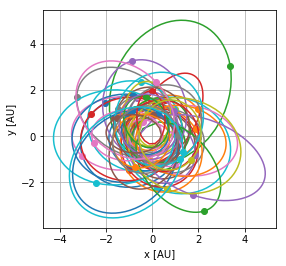

In [12]:
fig = plt.figure()
ax = plt.gca()
for i in range(50):
    o = asteroids.pop() #remove el
    asteroids.add(o) # place back into the set
    o.plot(num=50)

plt.grid()
ax.set_aspect(aspect=1)

In [13]:
len(asteroids)

1436

In [14]:
# create Earth
earth = Orbit(name='Earth')
earth.from_gtoc('Earth',54000,0.999988049532578, 1.671681163160e-2, 0.8854353079654e-3, 175.40647696473, 287.61577546182, 257.60683707535)
print(earth.details())

Orbit: Earth
 Epoch     :  54000
 a         :  0.99998805 AU
 e         :  0.01671681
 inc       :  0.00088544 deg
 LAN       :  175.40647696 deg
 argp      :  287.61577546 deg
 meanAnom0 :  257.60683708 deg
 trueAnom0 :  255.74455168 deg
 h         :  4455077233.10342026 km2/s
 r0        :  [1.00360834 -0.02160433 -0.00000091] AU
 v0        :  [0.15593867 29.66992368 -0.00045723] km/s


In [15]:
o=asteroids.pop()   # take random asteroid
asteroids.add(o)
print(o.details())

Orbit: '190119'
 Epoch     :  54800.0
 a         :  2.46271926 AU
 e         :  0.89100475
 inc       :  30.05670457 deg
 LAN       :  225.57320009 deg
 argp      :  19.84805084 deg
 meanAnom0 :  33.79449573 deg
 trueAnom0 :  150.44934382 deg
 h         :  3174505348.92910147 km2/s
 r0        :  [1.79241276 1.35830739 0.19051659] AU
 v0        :  [9.97027466 17.80252349 -3.09096670] km/s


In [16]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates

array([58500, 58510, 58520, 58530, 58540, 58550, 58560, 58570, 58580,
       58590, 58600, 58610, 58620, 58630, 58640, 58650, 58660, 58670,
       58680, 58690, 58700, 58710, 58720, 58730, 58740, 58750, 58760,
       58770, 58780, 58790, 58800, 58810, 58820, 58830, 58840, 58850,
       58860, 58870, 58880, 58890, 58900, 58910, 58920, 58930, 58940,
       58950, 58960, 58970, 58980, 58990])

In [17]:
# test lambert for one asteroid at initial time
r_earth, v_earth = earth.rv(epoch = earliest_launch_date)
r_ast, v_ast = o.rv(epoch=earliest_launch_date+60)

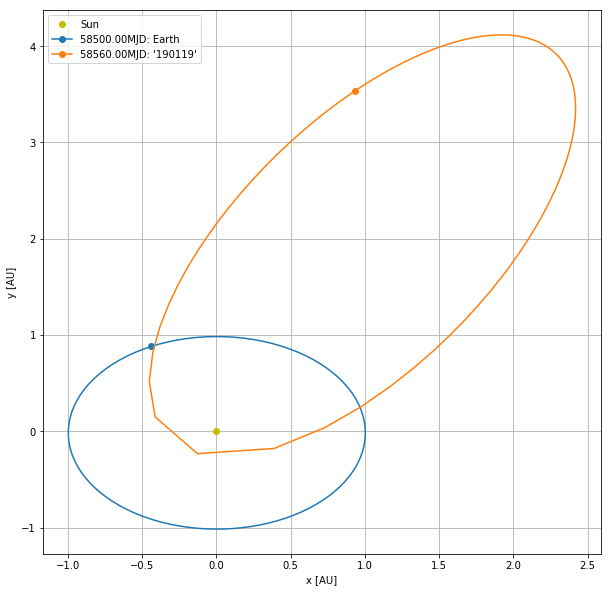

In [18]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date + 60)
plt.legend()
plt.grid()

In [19]:
norm(r_earth)/AU2km

0.9837090253526923

In [20]:
try:
    # use Lambert formulation by izzo by default
    v1, v2 = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
except:
    # use Bate Lambert formulation if izzo fails
    v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
    print('Used Bate-lambert')

In [21]:
# check both methods
v1izzo, v2izzo = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
print(f'{v1izzo},{v2izzo}')
v1bate, v2bate = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
print(f'{v1bate},{v2bate}')

[  57.68811415 -121.91795329    1.08315759],[ 31.28244339 120.90324796 -35.49062421]
[  57.68811415 -121.91795329    1.08315759],[ 31.28244339 120.90324796 -35.49062421]


In [22]:
v1, v2

(array([  57.68811415, -121.91795329,    1.08315759]),
 array([ 31.28244339, 120.90324796, -35.49062421]))

In [23]:
o_trx = Orbit(name='trx1')  # trajectory object

In [24]:
o_trx.from_rv(earliest_launch_date, r_earth, v1) # initial position vector of trajectory object

In [25]:
earliest_launch_date

58500

In [26]:
o_trx.__dict__

{'index': -2,
 'name': 'trx1',
 'mu': 132712440018.0,
 'epoch0': 58500,
 'r0': array([-6.53876158e+07,  1.31836086e+08, -1.94989337e+03]),
 'v0': array([  57.68811415, -121.91795329,    1.08315759]),
 'h': 399602694.83794177,
 'e': 1.071724203111725,
 'LAN': 2.0312505713634996,
 'inc': 0.4095907341901793,
 'argp': 2.7529763154580222,
 'trueAnom0': 3.5301757195984536,
 'meanAnom0': -15.567136048464192,
 'a': -8097435.757427418}

In [27]:
o_trx.trueAnom0

3.5301757195984536

In [28]:
o_trx.e

1.071724203111725

In [29]:
print(o_trx.details())

Orbit: trx1
 Epoch     :  58500
 a         :  -0.05412801 AU
 e         :  1.07172420
 inc       :  23.46782040 deg
 LAN       :  116.38208487 deg
 argp      :  157.73392398 deg
 meanAnom0 :  -891.93119468 deg
 trueAnom0 :  202.26416967 deg
 h         :  399602694.83794177 km2/s
 r0        :  [-0.43708921 0.88126980 -0.00001303] AU
 v0        :  [57.68811415 -121.91795329 1.08315759] km/s


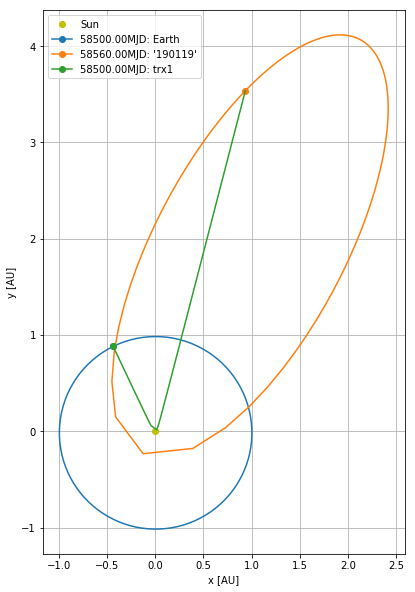

In [30]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date+60,num=100)
o_trx.plot(earliest_launch_date, earliest_launch_date + 60) # plots trajectory
plt.legend()
plt.grid()
ax = plt.gca()
ax.set_aspect(1)

In [31]:
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#earth.plot(start=earliest_launch_date,num=100,dim=3)

In [32]:
dv1=v1-v_earth
print(dv1)
print(norm(dv1))

[  84.86021593 -108.56965063    1.08291834]
137.80347599484807


In [33]:
dv2=v2-v_ast
print(dv2)
print(norm(dv2))

[ 38.43605301 128.31483287 -35.5365554 ]
138.58164840458116


In [34]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates = np.arange(58676-50, 58676+50, step=launch_step) # in MJD

print(launch_dates)

tof_vals = np.arange(20,65,5)
print(tof_vals)

[58626 58636 58646 58656 58666 58676 58686 58696 58706 58716]
[20 25 30 35 40 45 50 55 60]


In [35]:
type(earth)

orbit.Orbit

In [36]:

vinf_max = 4.1  # threshold c3 [km/s]

assert len(asteroids) == 1436, "check number of asteroids"
   
# store number of times where izzo lambert did not converge
use_izzo = 0
use_bate = 0

ind = 0
for ld in launch_dates:
    for tof in tof_vals:
        for ast in asteroids:

            re, ve = earth.rv(epoch=ld)
            ra, va = ast.rv(epoch=ld+tof)
            try:
                v1, v2 = lambert_izzo(earth.mu, re, ra,tof=tof*day2s,M=0, return_='short')
                use_izzo += 1
            except:
                v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
                use_bate += 1
             
            vinf = norm(v1-ve)
            
            if vinf<vinf_max:
                
                print(f'{ind}: date: {ld}, tof: {tof}, ast: {ast}, \t vinf: {vinf:3.2e}')
                ind += 1



C:\Users\yurio\Documents\GitHub\reGTOC04\jupyternotebooks\lambert_izzo.py:213: RuntimeWarning: invalid value encountered in double_scalars
  S_1 = (1- ll - x * eta)**0.5


0: date: 58626, tof: 50, ast: '2006WP127', 	 vinf: 3.94e+00
1: date: 58626, tof: 55, ast: '2006WP127', 	 vinf: 3.95e+00
2: date: 58626, tof: 55, ast: '2005NE21', 	 vinf: 3.78e+00
3: date: 58636, tof: 55, ast: '141593', 	 vinf: 3.84e+00
4: date: 58636, tof: 60, ast: '2000QW7', 	 vinf: 3.83e+00
5: date: 58636, tof: 60, ast: '2008SJ82', 	 vinf: 4.08e+00
6: date: 58636, tof: 60, ast: '141593', 	 vinf: 2.83e+00
7: date: 58646, tof: 50, ast: '141593', 	 vinf: 3.24e+00
8: date: 58646, tof: 55, ast: '2002JR100', 	 vinf: 3.71e+00
9: date: 58646, tof: 55, ast: '2000QW7', 	 vinf: 3.88e+00
10: date: 58646, tof: 55, ast: '2007DS7', 	 vinf: 3.93e+00
11: date: 58646, tof: 55, ast: '2008SJ82', 	 vinf: 4.00e+00
12: date: 58646, tof: 55, ast: '141593', 	 vinf: 2.26e+00
13: date: 58646, tof: 55, ast: '2006QV89', 	 vinf: 3.17e+00
14: date: 58646, tof: 60, ast: '2002JR100', 	 vinf: 2.88e+00
15: date: 58646, tof: 60, ast: '2000QW7', 	 vinf: 3.07e+00
16: date: 58646, tof: 60, ast: '2007DS7', 	 vinf: 2.79e+00

137: date: 58686, tof: 60, ast: '2004SA20', 	 vinf: 1.17e+00
138: date: 58686, tof: 60, ast: '2000QW7', 	 vinf: 1.21e+00
139: date: 58686, tof: 60, ast: '2001TB', 	 vinf: 3.61e+00
140: date: 58686, tof: 60, ast: '2006QV89', 	 vinf: 1.15e+00
141: date: 58686, tof: 60, ast: '2007RQ12', 	 vinf: 1.52e+00
142: date: 58696, tof: 30, ast: '2002JR100', 	 vinf: 3.65e+00
143: date: 58696, tof: 30, ast: '2000QW7', 	 vinf: 3.50e+00
144: date: 58696, tof: 30, ast: '2006QV89', 	 vinf: 3.27e+00
145: date: 58696, tof: 35, ast: '2002JR100', 	 vinf: 3.45e+00
146: date: 58696, tof: 35, ast: '2000QW7', 	 vinf: 2.26e+00
147: date: 58696, tof: 35, ast: '2008SJ82', 	 vinf: 4.06e+00
148: date: 58696, tof: 35, ast: '2006QV89', 	 vinf: 2.43e+00
149: date: 58696, tof: 35, ast: '2007RQ12', 	 vinf: 3.04e+00
150: date: 58696, tof: 40, ast: '2002JR100', 	 vinf: 3.47e+00
151: date: 58696, tof: 40, ast: '2000QW7', 	 vinf: 1.48e+00
152: date: 58696, tof: 45, ast: '2002JR100', 	 vinf: 3.55e+00
153: date: 58696, tof: 45,

In [37]:
print(f'Number of times izzo-lambert failed: {use_bate} out of {use_bate+use_izzo}')

Number of times izzo-lambert failed: 6708 out of 129240


In [38]:
sys.getsizeof(asteroids)  # what is this doing?

131296